In [15]:
from nvidia.dali import pipeline_def
import nvidia.dali.fn as fn
import nvidia.dali.types as types
from nvidia.dali.plugin.pytorch import DALIGenericIterator

In [2]:
from shopee_utils import *

In [3]:
train_df = add_splits(pd.read_csv(PATH/'train.csv'))

/home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [104]:
files = train_df[train_df.is_valid==True].image.tolist()

In [105]:
labs = train_df[train_df.is_valid==True].label_group.tolist()

In [106]:
len(files), len(labs)

(6852, 6852)

In [107]:
max_batch_size=128

In [126]:
@pipeline_def
def simple_pipeline():
    jpegs, labels = fn.readers.file(file_root=PATH/'train_images',files=files, labels=labs)
    images = fn.decoders.image_crop(jpegs, device='mixed', crop=[22])
    images = fn.resize_crop_mirror(images, resize_shorter=224, crop_w=224,crop_h=224)
    return images, labels

In [127]:
pipe = simple_pipeline(batch_size=max_batch_size,num_threads=8, device_id=0)
pipe.build()

RuntimeError: Critical error when building pipeline:
Error when constructing operator: decoders__ImageCrop encountered:
[/opt/dali/dali/operators/image/crop/crop_attr.h:62] Assert on "crop_arg_ndims >= 2 && crop_arg_ndims <= 3" failed: `crop` argument should have 2 or 3 elements depending on the input data shape
Stacktrace (100 entries):
[frame 0]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali_operators.so(+0x4366fe) [0x7f61dffe06fe]
[frame 1]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali_operators.so(+0x7bf0c6) [0x7f61e03690c6]
[frame 2]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali_operators.so(+0x7f4f41) [0x7f61e039ef41]
[frame 3]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali_operators.so(std::_Function_handler<std::unique_ptr<dali::OperatorBase, std::default_delete<dali::OperatorBase> > (dali::OpSpec const&), std::unique_ptr<dali::OperatorBase, std::default_delete<dali::OperatorBase> > (*)(dali::OpSpec const&)>::_M_invoke(std::_Any_data const&, dali::OpSpec const&)+0xc) [0x7f61dffdcbdc]
[frame 4]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali.so(+0x1643b1) [0x7f621b25f3b1]
[frame 5]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali.so(dali::InstantiateOperator(dali::OpSpec const&)+0x264) [0x7f621b25c204]
[frame 6]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali.so(dali::OpGraph::InstantiateOperators()+0xa2) [0x7f621b20d4c2]
[frame 7]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali.so(dali::Pipeline::Build(std::vector<std::pair<std::string, std::string>, std::allocator<std::pair<std::string, std::string> > >)+0x9f0) [0x7f621b27cd10]
[frame 8]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/backend_impl.cpython-38-x86_64-linux-gnu.so(+0x46b7f) [0x7f6230174b7f]
[frame 9]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/backend_impl.cpython-38-x86_64-linux-gnu.so(+0x828a8) [0x7f62301b08a8]
[frame 10]: /home/slex/programy/anaconda3/envs/fastai/bin/python(PyCFunction_Call+0x56) [0x55ac82a2cf76]
[frame 11]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyObject_MakeTpCall+0x22f) [0x55ac829ea85f]
[frame 12]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x18bfa1) [0x55ac82a38fa1]
[frame 13]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x10077f) [0x55ac829ad77f]
[frame 14]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyEval_EvalCodeWithName+0x2d2) [0x55ac82a37a92]
[frame 15]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyFunction_Vectorcall+0x1e3) [0x55ac82a38943]
[frame 16]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x10075e) [0x55ac829ad75e]
[frame 17]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyEval_EvalCodeWithName+0x2d2) [0x55ac82a37a92]
[frame 18]: /home/slex/programy/anaconda3/envs/fastai/bin/python(PyEval_EvalCodeEx+0x44) [0x55ac82a38754]
[frame 19]: /home/slex/programy/anaconda3/envs/fastai/bin/python(PyEval_EvalCode+0x1c) [0x55ac82ac6edc]
[frame 20]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x24f083) [0x55ac82afc083]
[frame 21]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x140699) [0x55ac829ed699]
[frame 22]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0xfeb84) [0x55ac829abb84]
[frame 23]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyGen_Send+0x149) [0x55ac82a31dc9]
[frame 24]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyEval_EvalFrameDefault+0x49a3) [0x55ac82a72363]
[frame 25]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyGen_Send+0x149) [0x55ac82a31dc9]
[frame 26]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyEval_EvalFrameDefault+0x49a3) [0x55ac82a72363]
[frame 27]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyGen_Send+0x149) [0x55ac82a31dc9]
[frame 28]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x1701cd) [0x55ac82a1d1cd]
[frame 29]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x10075e) [0x55ac829ad75e]
[frame 30]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyFunction_Vectorcall+0x10b) [0x55ac82a3886b]
[frame 31]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0xfeb84) [0x55ac829abb84]
[frame 32]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyFunction_Vectorcall+0x10b) [0x55ac82a3886b]
[frame 33]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x10075e) [0x55ac829ad75e]
[frame 34]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyEval_EvalCodeWithName+0x2d2) [0x55ac82a37a92]
[frame 35]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyFunction_Vectorcall+0x1e3) [0x55ac82a38943]
[frame 36]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x18be79) [0x55ac82a38e79]
[frame 37]: /home/slex/programy/anaconda3/envs/fastai/bin/python(PyVectorcall_Call+0x71) [0x55ac829ea041]
[frame 38]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyEval_EvalFrameDefault+0x1fdb) [0x55ac82a6f99b]
[frame 39]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyEval_EvalCodeWithName+0x659) [0x55ac82a37e19]
[frame 40]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x18bd20) [0x55ac82a38d20]
[frame 41]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x10011a) [0x55ac829ad11a]
[frame 42]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x215056) [0x55ac82ac2056]
[frame 43]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x1847f3) [0x55ac82a317f3]
[frame 44]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x140699) [0x55ac829ed699]
[frame 45]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x7df36) [0x55ac8292af36]
[frame 46]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x8af1b) [0x55ac82937f1b]
[frame 47]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x1409a0) [0x55ac829ed9a0]
[frame 48]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0xfeb84) [0x55ac829abb84]
[frame 49]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyEval_EvalCodeWithName+0x659) [0x55ac82a37e19]
[frame 50]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyFunction_Vectorcall+0x1e3) [0x55ac82a38943]
[frame 51]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x10075e) [0x55ac829ad75e]
[frame 52]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x215056) [0x55ac82ac2056]
[frame 53]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x1847f3) [0x55ac82a317f3]
[frame 54]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x140699) [0x55ac829ed699]
[frame 55]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x7df36) [0x55ac8292af36]
[frame 56]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x8af1b) [0x55ac82937f1b]
[frame 57]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x1409a0) [0x55ac829ed9a0]
[frame 58]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0xfeb84) [0x55ac829abb84]
[frame 59]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyEval_EvalCodeWithName+0x659) [0x55ac82a37e19]
[frame 60]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x18bd20) [0x55ac82a38d20]
[frame 61]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0xfeb84) [0x55ac829abb84]
[frame 62]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x215056) [0x55ac82ac2056]
[frame 63]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x1847f3) [0x55ac82a317f3]
[frame 64]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x140699) [0x55ac829ed699]
[frame 65]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x7df36) [0x55ac8292af36]
[frame 66]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x8af1b) [0x55ac82937f1b]
[frame 67]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x1409a0) [0x55ac829ed9a0]
[frame 68]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0xfeb84) [0x55ac829abb84]
[frame 69]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyEval_EvalCodeWithName+0x659) [0x55ac82a37e19]
[frame 70]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyFunction_Vectorcall+0x1e3) [0x55ac82a38943]
[frame 71]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x18be79) [0x55ac82a38e79]
[frame 72]: /home/slex/programy/anaconda3/envs/fastai/bin/python(PyVectorcall_Call+0x71) [0x55ac829ea041]
[frame 73]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyEval_EvalFrameDefault+0x1fdb) [0x55ac82a6f99b]
[frame 74]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyGen_Send+0x149) [0x55ac82a31dc9]
[frame 75]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x1701cd) [0x55ac82a1d1cd]
[frame 76]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x10075e) [0x55ac829ad75e]
[frame 77]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyFunction_Vectorcall+0x10b) [0x55ac82a3886b]
[frame 78]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x18bee7) [0x55ac82a38ee7]
[frame 79]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x7df36) [0x55ac8292af36]
[frame 80]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x8af1b) [0x55ac82937f1b]
[frame 81]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x1409a0) [0x55ac829ed9a0]
[frame 82]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x10077f) [0x55ac829ad77f]
[frame 83]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyEval_EvalCodeWithName+0x659) [0x55ac82a37e19]
[frame 84]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyObject_FastCallDict+0x20c) [0x55ac82a3948c]
[frame 85]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x22b4be) [0x55ac82ad84be]
[frame 86]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyObject_MakeTpCall+0x22f) [0x55ac829ea85f]
[frame 87]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyEval_EvalFrameDefault+0x475) [0x55ac82a6de35]
[frame 88]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyFunction_Vectorcall+0x10b) [0x55ac82a3886b]
[frame 89]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x10075e) [0x55ac829ad75e]
[frame 90]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyEval_EvalCodeWithName+0x7df) [0x55ac82a37f9f]
[frame 91]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyFunction_Vectorcall+0x1e3) [0x55ac82a38943]
[frame 92]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x7df36) [0x55ac8292af36]
[frame 93]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x8af1b) [0x55ac82937f1b]
[frame 94]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x1409a0) [0x55ac829ed9a0]
[frame 95]: /home/slex/programy/anaconda3/envs/fastai/bin/python(PyVectorcall_Call+0x71) [0x55ac829ea041]
[frame 96]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyEval_EvalFrameDefault+0x53e0) [0x55ac82a72da0]
[frame 97]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyFunction_Vectorcall+0x10b) [0x55ac82a3886b]
[frame 98]: /home/slex/programy/anaconda3/envs/fastai/bin/python(+0x10075e) [0x55ac829ad75e]
[frame 99]: /home/slex/programy/anaconda3/envs/fastai/bin/python(_PyFunction_Vectorcall+0x10b) [0x55ac82a3886b]

Current pipeline object is no longer valid.

In [113]:
pipe_out = pipe.run()
print(pipe_out)

RuntimeError: Critical error in pipeline:
Error when executing CPU operator decoders__ImageCrop encountered:
Error in thread 3: [/opt/dali/dali/operators/decoder/host/host_decoder.cc:41] [/opt/dali/dali/image/jpeg.cc:91] Assert on "crop.IsInRange(shape)" failed
Stacktrace (9 entries):
[frame 0]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali.so(+0x8f36e) [0x7f621b18a36e]
[frame 1]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali.so(+0x1962b1) [0x7f621b2912b1]
[frame 2]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali.so(dali::Image::Decode()+0x34) [0x7f621b28ebb4]
[frame 3]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali_operators.so(+0x7d36fa) [0x7f61e037d6fa]
[frame 4]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali_operators.so(+0x4608a9) [0x7f61e000a8a9]
[frame 5]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali.so(dali::ThreadPool::ThreadMain(int, int, bool)+0x1f0) [0x7f621b263af0]
[frame 6]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali.so(+0x8ac9df) [0x7f621b9a79df]
[frame 7]: /lib/x86_64-linux-gnu/libpthread.so.0(+0x9590) [0x7f6237e77590]
[frame 8]: /lib/x86_64-linux-gnu/libc.so.6(clone+0x43) [0x7f6237d9d223]
. File: 015b1ea9c715a7a048fb5c387c5ba8db.jpg
Stacktrace (7 entries):
[frame 0]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali_operators.so(+0x4366fe) [0x7f61dffe06fe]
[frame 1]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali_operators.so(+0x7d41fb) [0x7f61e037e1fb]
[frame 2]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali_operators.so(+0x4608a9) [0x7f61e000a8a9]
[frame 3]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali.so(dali::ThreadPool::ThreadMain(int, int, bool)+0x1f0) [0x7f621b263af0]
[frame 4]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali.so(+0x8ac9df) [0x7f621b9a79df]
[frame 5]: /lib/x86_64-linux-gnu/libpthread.so.0(+0x9590) [0x7f6237e77590]
[frame 6]: /lib/x86_64-linux-gnu/libc.so.6(clone+0x43) [0x7f6237d9d223]

Current pipeline object is no longer valid.

In [92]:
images, labels = pipe_out
print("Images is_dense_tensor: " + str(images.is_dense_tensor()))
print("Labels is_dense_tensor: " + str(labels.is_dense_tensor()))

Images is_dense_tensor: True
Labels is_dense_tensor: True


In [95]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline

def show_images(image_batch):
    columns = 4
    rows = (max_batch_size + 1) // (columns)
    fig = plt.figure(figsize = (32,(32 // columns) * rows))
    gs = gridspec.GridSpec(rows, columns)
    for j in range(rows*columns):
        plt.subplot(gs[j])
        print(image_batch.at(j))
        plt.axis("off")
        plt.imshow(image_batch.at(j))

TypeError: Image data of dtype object cannot be converted to float

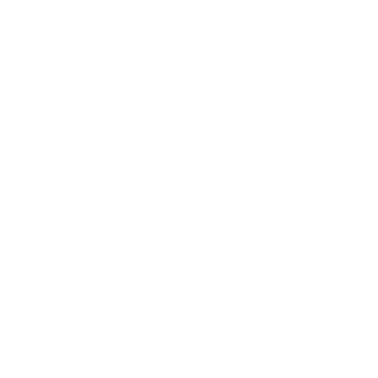

In [96]:
show_images(images)

In [99]:
dali_iter = DALIGenericIterator(pipe, ['data', 'label'])

In [100]:
%%time
batches=0
for _ in dali_iter:
    batches+=1
batches

RuntimeError: Critical error in pipeline:
Error when executing Mixed operator decoders__Image encountered:
Error in thread 7: [/opt/dali/dali/operators/decoder/nvjpeg/nvjpeg_decoder_decoupled_api.h:837] NVJPEG error "5" : NVJPEG_STATUS_ALLOCATOR_FAILURE 9f38eeeb9d91b3c093c98c37ddfc6914.jpg
Stacktrace (7 entries):
[frame 0]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali_operators.so(+0x4366fe) [0x7f61dffe06fe]
[frame 1]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali_operators.so(+0x7de7ff) [0x7f61e03887ff]
[frame 2]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali_operators.so(+0x7df1c4) [0x7f61e03891c4]
[frame 3]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali.so(dali::ThreadPool::ThreadMain(int, int, bool)+0x1f0) [0x7f621b263af0]
[frame 4]: /home/slex/programy/anaconda3/envs/fastai/lib/python3.8/site-packages/nvidia/dali/libdali.so(+0x8ac9df) [0x7f621b9a79df]
[frame 5]: /lib/x86_64-linux-gnu/libpthread.so.0(+0x9590) [0x7f6237e77590]
[frame 6]: /lib/x86_64-linux-gnu/libc.so.6(clone+0x43) [0x7f6237d9d223]

Current pipeline object is no longer valid.